## ExMAS
> *Exact Matching of Attractive Shared rides (ExMAS) for system-wide strategic evaluations*
> 
> Kucharski R. Cats O. ,_Transportation Research Part: B_, 2020
>
> 

---
#### GAME THEORY

Code to reproduce experiments from the paper:

>_Fielbaum, Andres, Rafał Kucharski, Oded Cats, and Javier Alonso-Mora. "How to split the costs and charge the travellers sharing a ride? Aligning system’s optimum with users’ equilibrium." European Journal of Operational Research (2021)._

> Here we use results computed with the python code from `PycharmProjects/ExMAS/ExMAS/game/pipeline.py`


---

In [ ]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [ ]:
from IPython.display import display
from matplotlib.lines import Line2D
pd.options.display.max_columns = None

In [ ]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [ ]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching

In [ ]:
EXPERIMENT_NAME = 'res400b_2'
KPIs = pd.read_csv('ExMAS/extras/game_results/{}_KPIs.csv'.format(EXPERIMENT_NAME), index_col = 0)
rides = pd.read_csv('ExMAS/extras/game_results/{}_rides.csv'.format(EXPERIMENT_NAME), index_col = 0)
rm = pd.read_csv('ExMAS/extras/game_results/{}_rm.csv'.format(EXPERIMENT_NAME), index_col = [0,1])

FileNotFoundError: [Errno 2] No such file or directory: 'ExMAS/extras/game_results/test_KPIs.csv'

In [6]:
PRICINGS = ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']

for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']):
        col_name = "pruned_Pricing-{}_Pruning-['{}']".format(PRICING, ALGO)
        rm[col_name] = rm.apply(lambda r: rides.loc[r.ride][col_name], axis = 1)

In [7]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
ALGOS = ['EXMAS','TNE', 'HERMETIC', 'RUE', 'RSIE', 'TSE']
titles = ['user direct costs $C(G,i)$','uniform', 'externality-based','residual','subgroup-based']



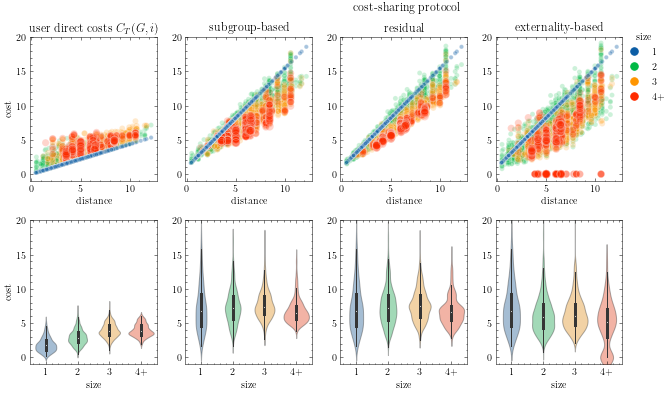

In [11]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','SUBGROUP','RESIDUAL','EXTERNALITY']
ALGOS = ['EXMAS']
titles = ['user direct costs $C_T(G,i)$' ,'subgroup-based', 'residual' , 'externality-based']

fig, axes = plt.subplots(2,4,figsize = (10,6), sharey=False, sharex = False)
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000
df['sizes'] = 0.7*df['degree']**2 
df['size']=df['deg']

def single_scatter(col, df, ax,x = 'distance', alpha = 0.2, legend = False, text = True):
    pal = sns.color_palette(colors[0:df.deg.nunique()])
    sns.scatterplot(x=x,y=col, data = df, ax = ax, hue = 'deg', alpha = alpha, palette = pal, size = df['sizes'])
    sns.scatterplot(x=x,y=col, data = df[df.degree==1], ax = ax, alpha = alpha, color = colors[0], size = df['sizes'])
    if not legend:
        ax.get_legend().remove()
    if text:
        label = "$|\mathcal{G}|$ = "+ str(df.ride.nunique()) +"\n$\overline{|G|}$ = "+ str(round(df.degree.mean(),2)) +"\n $\overline{C_i}$ = "+ str(round(df[col].mean(),2))
        ax.text(0.05,0.6,label,rotation=0, fontsize = 10, transform=ax.transAxes)
        

for i,col in enumerate(cols):
    
#     sns.scatterplot(x='distance',y=col, data = df, ax = axes[0][i], hue = 'deg', alpha = 0.2, palette = palette, size = df['size'])
#     if col is not 'SUBGROUP':
#         sns.scatterplot(x='distance',y=col, data = df[df.degree==1], ax = axes[0][i], alpha = 0.2, color = 'blue', size = df['size'])    
    
    for j, ALGO in enumerate(ALGOS):
        #axes[0][j].set_title(ALGO)
                            
        matching_column = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME,'UNIFORM' if col == 'user discomfort' else col,ALGO)
        pruning_column = "pruned_Pricing-{}_Pruning-['{}']".format('UNIFORM' if col == 'user discomfort' else col, ALGO)
        single_scatter(col, df = df[df[pruning_column]==True], ax = axes[0][i], legend = False, text = False)
        #single_scatter(col, df = df[df[pruning_column]==True], ax = axes[1][i], legend = False, x = 'degree', text = False)
        sns.violinplot(x='size',y=col, data = df[df[pruning_column]==True], ax = axes[1][i], alpha = 0.4, size = df[df[pruning_column]]['sizes'])
        for violin, alpha in zip(axes[1][i].collections[::2], [0.4,0.4,0.4,0.4]):
            violin.set_alpha(alpha)
        ax = axes[1][i].set_ylim((-1,20))
        ax = axes[0][i].set_ylim((-1,20))
        
        #single_scatter(col, df = df[df[matching_column]==1], ax = axes[2*j+1][i], alpha = 0.6)
        #axes[2*j][0].set_ylabel('no pruning' if ALGO == 'EXMAS' else ALGO + " pruning")
        #axes[2*j+1][0].set_ylabel('no pruning match' if ALGO == 'EXMAS' else ALGO + " matching")
        #if i ==0:
        #axes[j][0].set_ylabel(ALGO)
            #axes[2*j+1][0].set_ylabel("matching")
            #axes[2*j][0].text(-0.4, -0.2, ALGO,rotation='vertical', transform=axes[2*j][0].transAxes, fontsize = 12)
            
        axes[0][i].set_title(titles[i])
        axes[0][i].set_ylabel('')
        axes[1][i].set_ylabel('')
    axes[0][0].set_ylabel('cost')
    axes[1][0].set_ylabel('cost')
    
custom = [Line2D([], [], marker='.', color=colors[i], linestyle='', ms = 15) for i in [0,1,2,3]]

axes[0][-1].legend(custom, ['1', '2','3','4+'], loc='upper right',bbox_to_anchor=(1.4, 1.1), title = 'size')          
        
    #if i<len(cols)-1:
    #    axes[0][i].get_legend().remove()
fig.text(0.5, 0.95,'cost-sharing protocol', fontsize = 12)
plt.tight_layout(rect=[0, 0.05, 0.95, 0.95])
plt.savefig('scatters.png')

,algo,pricing,max excess,mean excess
0,EXMAS,EXTERNALITY,1.116888,0.112372
1,HERMETIC,EXTERNALITY,1.116888,0.106979
2,RUE,EXTERNALITY,1.116888,0.112372
3,RSIE,EXTERNALITY,1.116888,0.112372
4,EXMAS,RESIDUAL,0.392725,0.040273
5,HERMETIC,RESIDUAL,0.378740,0.040518
6,RUE,RESIDUAL,0.392725,0.040273
7,RSIE,RESIDUAL,0.392725,0.041076
8,EXMAS,SUBGROUP,0.436466,0.044483
9,HERMETIC,SUBGROUP,0.436466,0.044483


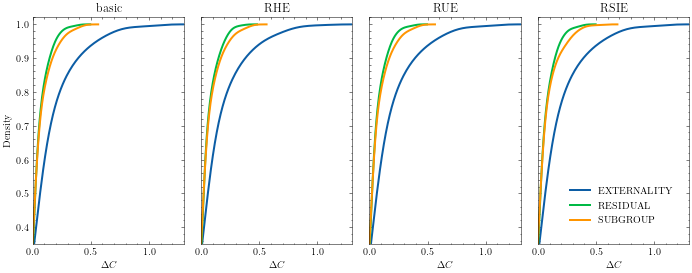

In [11]:
PRICINGS = ['EXTERNALITY','RESIDUAL','SUBGROUP']
ALGO_NAMES = ['basic', 'RHE', 'RUE', 'RSIE']
fig, axes = plt.subplots(1,4, figsize = (10,4), sharex = True, sharey = True)
j=-1
ret = list()
for i,PRICING in enumerate(PRICINGS):
    
    for j, ALGO in enumerate(['EXMAS', 'HERMETIC', 'RUE', 'RSIE']):
        
        col = "Experiment-{}_Pricing-{}_Objective-['total_group_cost']_Pruning-['{}']_minmax-min".format(EXPERIMENT_NAME, PRICING, ALGO)
        to_plot = rm[rm[col] == 1]
        
        to_plot['$\Delta C$']=(to_plot[PRICING]-to_plot['desired_{}'.format(PRICING)])/to_plot['desired_{}'.format(PRICING)]
        to_plot['$\Delta C$'] = to_plot['$\Delta C$'].replace(np.inf,np.nan).fillna(0)
        ret.append([ALGO, PRICING, to_plot['$\Delta C$'].max(), to_plot['$\Delta C$'].mean()] )
        sns.distplot(to_plot['$\Delta C$'],ax = axes[j], kde = True, hist = False, 
                     label = PRICING, 
                     rug_kws={"alpha":0.1, 'height':0.2, 'lw':2}, 
                     kde_kws={'bw':0.5, 'lw': 2, 'cumulative': True}, rug = False) 
        axes[j].set_xlim((0,1.3))
        axes[j].set_title(ALGO_NAMES[j])
        if j>0:
            axes[j].set_ylabel('')
        #axes[j].get_legend().remove()
        axes[j].set_ylim((0.35,1.02))
axes[-1].legend(bbox_to_anchor=(0.15, 0.3))
plt.tight_layout()
plt.savefig('hist.png', dpi = 600)
pd.DataFrame(ret,columns = ['algo','pricing','max excess', 'mean excess'])

---
(c) Rafał Kucharski, Delft, 2020